In [ ]:
# Q1) Number of multiplication need to perform a matrix multiplication between a (n, k) and (k, m) matrix = K*m*n
#     Number of multiplication need to perform a matrix Addition between a (n, k) and (k, m) matrix = (k-1)(m*n)

In [ ]:
#Q2)

import numpy as np
import time
a = [[1,2],[3,4],[6,7]]
b = [[4,7,2],[3,1,5]]

def matrix_Multiplication(a,b):
  row_a = len(a)
  col_a = len(a[0])
  row_b = len(b)
  col_b = len(b[0])

  if col_a != row_b:
    return False

  else:
    result = [[ 0 for j in range (col_b)] for i in range (row_a)]
    for i in range (row_a):
      for j in range(col_b):
        for k in range(col_a):
          result[i][j] += a[i][k]*b[k][j]

  return result


start = time.time()
Result = matrix_Multiplication(a,b)
end = time.time()

t1 = end - start
print("Result using list:\n")
for x in (Result):
  print(x)


# using numpy

A = np.array(a)
B = np.array(b)

start_np = time.time()
Result_np = np.dot(A,B)
end_np = time.time()

t2 = end_np - start_np
print("\nResult using numpy:\n")
print(Result_np,"\n")



print ("Time taken by list : ", t1)
print ("Time taken by np :", t2)
# on comparing both the solutions, numpy came to be faster.
# Because numpy uses optimized library which makes it faster.


Result using list:

[10, 9, 12]
[24, 25, 26]
[45, 49, 47]

Result using numpy:

[[10  9 12]
 [24 25 26]
 [45 49 47]] 

Time taken by list :  6.842613220214844e-05
Time taken by np : 0.00011873245239257812


In [ ]:
#Q4) (2xy + y^3 cos(x) ,x^2 + 3y^2 sin(x))

In [ ]:
#Q5)
import jax
import jax.numpy as jnp

def f(x,y):
  return (x**2)*y + (y**3)*jnp.sin(x)

def analytic_solution(x,y):
  df_dx = 2*x*y + (y**3)*jnp.cos(x)
  df_dy = x**2 + 3*(y**2)*jnp.sin(x)
  return jnp.array([df_dx, df_dy])

def gradient (f,x,y):
  grad_f = jax.grad(lambda x,y: f(x,y),argnums = (0,1))
  return grad_f(x,y)

X = 1.0
Y = 1.0

grad_analytical = analytic_solution(X,Y)
grad_jax = gradient(f,X,Y)

print("Analytical solution value:\n",grad_analytical)
print("\nJAX solution value :\n",grad_jax)
# they match each other

Analytical solution value:
 [2.5403023 3.5244129]

JAX solution value :
 (Array(2.5403023, dtype=float32, weak_type=True), Array(3.5244129, dtype=float32, weak_type=True))


In [ ]:
#Q6)
import jax
import jax.numpy as jnp
import sympy as sp

def f(x, y):
    return (x**2) * y + (y**3) * jnp.sin(x)

x, y = sp.symbols('x y')
f_sympy = (x**2) * y + (y**3) * sp.sin(x)

df_dx_sympy = sp.diff(f_sympy, x)
df_dy_sympy = sp.diff(f_sympy, y)

df_dx_func = sp.lambdify((x, y), df_dx_sympy, 'numpy')
df_dy_func = sp.lambdify((x, y), df_dy_sympy, 'numpy')

def analytic_solution(x, y):
    df_dx = 2 * x * y + (y**3) * jnp.cos(x)
    df_dy = x**2 + 3 * (y**2) * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

def compute_gradient(f, x, y):

    x = jnp.array(x, dtype=jnp.float32)
    y = jnp.array(y, dtype=jnp.float32)

    def func(x, y):
        return f(x, y)

    grad_f = jax.grad(lambda x, y: func(x, y), argnums=(0, 1))
    return grad_f(x, y)

X = 1.0
Y = 1.0

grad_analytical = analytic_solution(X, Y)
grad_jax = compute_gradient(f, X, Y)

grad_dx_sympy = df_dx_func(X, Y)
grad_dy_sympy = df_dy_func(X, Y)

print("Analytical Gradient (JAX):", grad_analytical)
print("JAX Gradient:", grad_jax)
print("Symbolic Gradient (SymPy) df/dx:", grad_dx_sympy)
print("Symbolic Gradient (SymPy) df/dy:", grad_dy_sympy)


Analytical Gradient (JAX): [2.5403023 3.5244129]
JAX Gradient: (Array(2.5403023, dtype=float32), Array(3.5244129, dtype=float32))
Symbolic Gradient (SymPy) df/dx: 2.5403023058681398
Symbolic Gradient (SymPy) df/dy: 3.5244129544236893


In [ ]:
#Q7) nested dictionary
student_records = {
    2022: {
        "Branch 1": {
            1: {"Name": "Praveen", "Marks": {"Maths": 100, "English": 70}},
            2: {"Name": "Rahul", "Marks": {"Maths": 85, "English": 90}},
        },
        "Branch 2": {
            1: {"Name": "Ashis", "Marks": {"Maths": 75, "English": 80}},
        },
    },
    2023: {
        "Branch 1": {
            1: {"Name": "Rohit", "Marks": {"Maths": 95, "English": 88}},
        },
        "Branch 2": {
            1: {"Name": "Vaishav", "Marks": {"Maths": 80, "English": 85}},
        },
    },
    2024: {
        "Branch 1": {
            1: {"Name": "Zaid", "Marks": {"Maths": 90, "English": 92}},
        },
        "Branch 2": {
            1: {"Name": "Gaurav", "Marks": {"Maths": 70, "English": 78}},
        },
    },
    2025: {
        "Branch 1": {
            1: {"Name": "Hitesh", "Marks": {"Maths": 88, "English": 84}},
        },
        "Branch 2": {
            1: {"Name": "Sammer", "Marks": {"Maths": 77, "English": 81}},
        },
    },
}
my_math_marks = student_records[2022]["Branch 1"][1]["Marks"]["Maths"] #Praveen
print(my_math_marks)

100


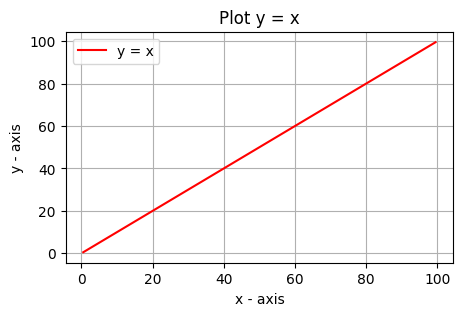

In [ ]:
#Q9)
import numpy as np
import matplotlib.pyplot as plt


# y = x
x = np.arange(0.5,100.0,0.5)
y = x
plt.figure(figsize = (5,3))
plt.plot(x,y ,label = 'y = x',color = 'red')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title("Plot y = x")
plt.legend()
plt.grid(True)
plt.show()


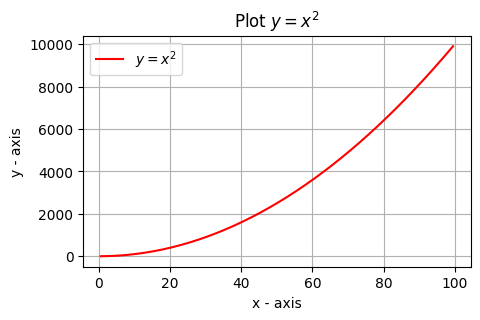

In [ ]:
#Q9)
import numpy as np
import matplotlib.pyplot as plt


# y = x^2
x = np.arange(0.5,100.0,0.5)
y = x**2
plt.figure(figsize = (5,3))
plt.plot(x,y ,label = '$y = x^2$',color = 'red')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title("Plot $y = x^2$")
plt.legend()
plt.grid(True)
plt.show()

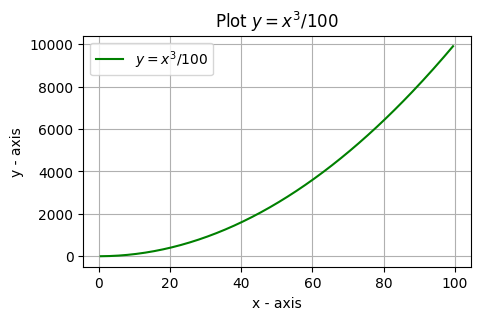

In [ ]:
#Q9)
import numpy as np
import matplotlib.pyplot as plt


# y = x^3/100
x = np.arange(0.5,100.0,0.5)
y = x**2
plt.figure(figsize = (5,3))
plt.plot(x,y ,label = '$y = x^3/100$',color = 'green')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title("Plot $y = x^3/100$")
plt.legend()
plt.grid(True)
plt.show()


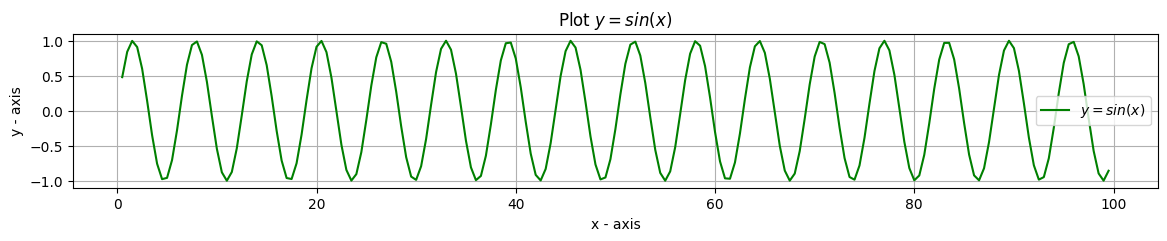

In [ ]:
#Q9)
import numpy as np
import matplotlib.pyplot as plt


# y = sin(x)
x = np.arange(0.5,100.0,0.5)
y = np.sin(x)
plt.figure(figsize = (14,2))
plt.plot(x,y ,label = '$y = sin(x)$',color = 'green')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title("Plot $y = sin(x)$")
plt.legend()
plt.grid(True)
plt.show()


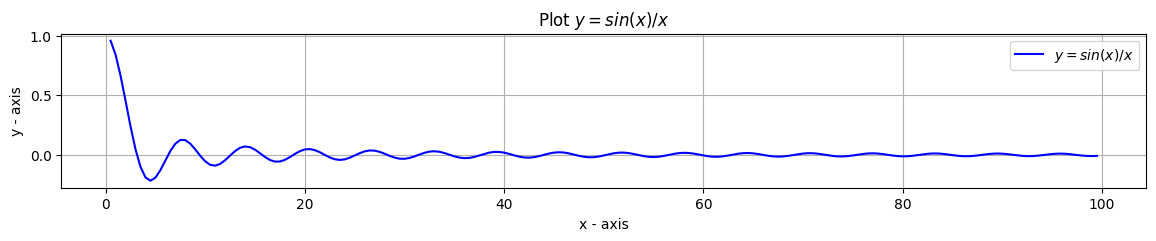

In [ ]:
#Q9)
import numpy as np
import matplotlib.pyplot as plt


# y = sin(x)/x
x = np.arange(0.5,100.0,0.5)
y = np.sin(x)/x
plt.figure(figsize = (14,2))
plt.plot(x,y ,label = '$y = sin(x)/x$',color = 'blue')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title("Plot $y = sin(x)/x$")
plt.legend()
plt.grid(True)
plt.show()


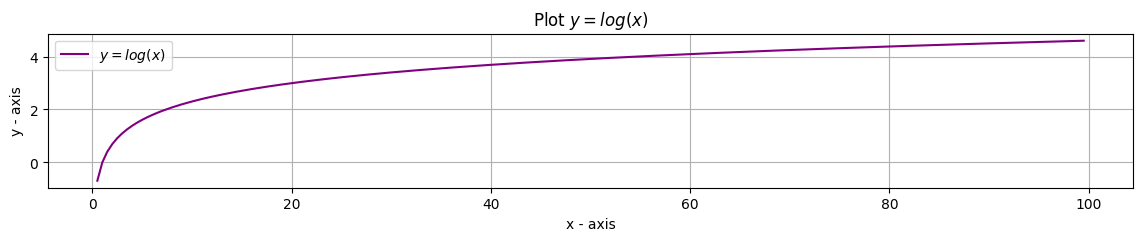

In [ ]:
#Q9)
import numpy as np
import matplotlib.pyplot as plt


# y = log(x)
x = np.arange(0.5,100.0,0.5)
y = np.log(x)
plt.figure(figsize = (14,2))
plt.plot(x,y ,label = '$y = log(x)$',color = 'purple')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title("Plot $y = log(x)$")
plt.legend()
plt.grid(True)
plt.show()


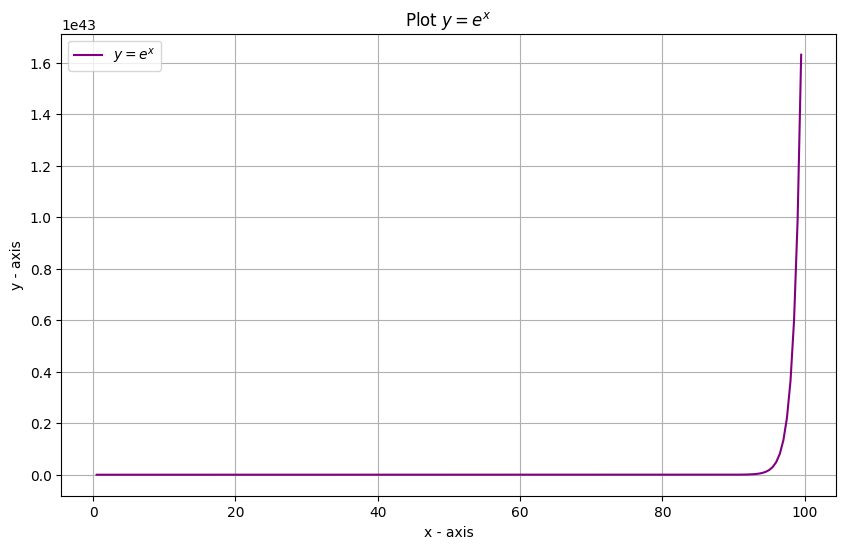

In [ ]:
#Q9)
import numpy as np
import matplotlib.pyplot as plt


# y = e^x
x = np.arange(0.5,100.0,0.5)
y = np.exp(x)
plt.figure(figsize = (10,6))
plt.plot(x,y ,label = '$y = e^x$',color = 'purple')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title("Plot $y = e^x$")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Q10)
import numpy as np
import pandas as pd

x = np.random.uniform(1,2, size = (20,5))


df  = pd.DataFrame(x,columns = ['a','b','c','d','e'])

std_dev = df.std()
max_std = std_dev.idxmax()
print ("Column with higest standar deviation : ", max_std)

row_mean = df.mean(axis = 1)
min_row = row_mean.idxmin()
print("Row with minimum mean : " , min_row)

Column with higest standar deviation :  c
Row with minimum mean :  17


In [ ]:
#Q11)
import numpy as np
import pandas as pd

x = np.random.uniform(1,2,size = (20,5))

df = pd.DataFrame(x,columns = ['a','b','c','d','e'])
df['f'] = df[['a','b','c','d','e']].sum(axis = 1)
df['g'] = df['f'].apply(lambda x :'LT8' if x<8  else 'GT8')

count = df[df['g']=='LT8'].shape[0]
print("Number of rows in the dataframe where the value in the column “g” is “LT8”: ", count)

std_LT8 = df[df['g']=='LT8']['f'].std()
std_GT8 = df[df['g']=='GT8']['f'].std()

print("Standard deviation of f where g is LT8 : ", std_LT8)
print("Standard deviation of f where g is GT8 : ", std_GT8)


Number of rows in the dataframe where the value in the column “g” is “LT8”:  15
Standard deviation of f where g is LT8 :  0.3258589250427802
Standard deviation of f where g is GT8 :  0.1795425905879315


In [ ]:
#Q12)
# Example for Broadcasting
import numpy as np

a = np.array([[1,2,3,4],[5,6,7,8]])
b = np.array([[10,20,30,40]])

c = a + b

print ("2D array a :\n",a)
print ("\n1D array b : \n",b)
print ("\nBroadcasting resulted in c array:\n",c)

2D array a :
 [[1 2 3 4]
 [5 6 7 8]]

1D array b : 
 [[10 20 30 40]]

Broadcasting resulted in c array:
 [[11 22 33 44]
 [15 26 37 48]]


In [2]:
#Q13)
import numpy as np

arr = [1,5,7,9,4,0]
index = 0
min = arr[0]
l = len(arr)
for i in range(1,l):
  if arr[i]< min:
    min = arr[i]
    index = i

my_argmin = index
np_argmin = np.argmin(arr)

print(" Array :\n", arr)
print("\nMy argmin index :", my_argmin)
print("Numpy argmin index :", np_argmin)
print("My argmin matches numpy argmin: ", my_argmin == np_argmin)

 Array :
 [1, 5, 7, 9, 4, 0]

My argmin index : 5
Numpy argmin index : 5
My argmin matches numpy argmin:  True
